In [11]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from pymongo import MongoClient
from tqdm import tqdm

In [12]:
client = MongoClient('localhost', 27017)
db = client['IAtest']

analisis_predictivos = db['modelos_de_analisis']
data = list(analisis_predictivos.find())

In [13]:
acciones_preventivas = [
    "Mantener reposo en cama",
    "Beber líquidos abundantes",
    "Tomar medicamentos para el dolor de cabeza",
    "Consultar a un médico",
    "Realizar ejercicios de respiración profunda",
    "Evitar alimentos grasosos",
    "Aplicar compresas frías en la frente",
    "Monitorear la presión arterial regularmente",
]

In [15]:
sintomas_list = []
signos_vitales_list = []
acciones_preventivas_list = []
caracteristica_list = []

for value in tqdm(data, desc="Realizando Analisis", unit="modelo"):
    caracteristica = []
    sintomas = value["sintomas"]
    caracteristica = [1 if sintoma else 0 for sintoma in sintomas.values()]

    signos_vitales = value["signos_vitales"]    
    for signos_vitales in signos_vitales.values():
        caracteristica.append(signos_vitales)
    
    caracteristica_list.append(caracteristica)
    acciones_preventivas_list.append(acciones_preventivas.index(value["accion_preventiva"]))
 
caracteristica_list = np.array(caracteristica_list)
acciones_preventivas_list = np.array(acciones_preventivas_list)

Realizando Analisis:   0%|          | 0/800000 [00:00<?, ?modelo/s]

Realizando Analisis: 100%|██████████| 800000/800000 [00:03<00:00, 248399.03modelo/s]


In [16]:
print(len(caracteristica_list))
print(len(acciones_preventivas_list))

800000
800000


In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape=[15])
])


# model.compile(optimizer='Adam', loss='mean_squared_error')
model.compile(optimizer=Adam(0.01), loss='mean_squared_error')
# model.compile(optimizer='sgd', loss='mean_squared_error')

caracteristica_list = tf.stack(caracteristica_list)
acciones_preventivas_list = tf.stack(acciones_preventivas_list)

c:\Users\developer\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
historial = model.fit(np.array(caracteristica_list), np.array(acciones_preventivas_list),epochs=10)

test_loss = model.evaluate(np.array(caracteristica_list), np.array(acciones_preventivas_list))
print(f'Error cuadrático medio en datos de entrenamiento: {test_loss}')

Epoch 1/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 13s 489us/step - loss: 9.1706
Epoch 2/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 13s 499us/step - loss: 0.0124
Epoch 3/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 12s 494us/step - loss: 0.0124
Epoch 4/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 13s 506us/step - loss: 0.0127
Epoch 5/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 13s 513us/step - loss: 0.0127
Epoch 6/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 12s 497us/step - loss: 0.0124
Epoch 7/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 13s 506us/step - loss: 0.0128
Epoch 8/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 13s 503us/step - loss: 0.0127
Epoch 9/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 13s 512us/step - loss: 0.0128
Epoch 10/10
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 13s 514us/step - loss: 0.0127
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 11s 445us/step - loss: 0.0688
Error cuadrático medio en datos de entrenamiento: 0.07353173196315765


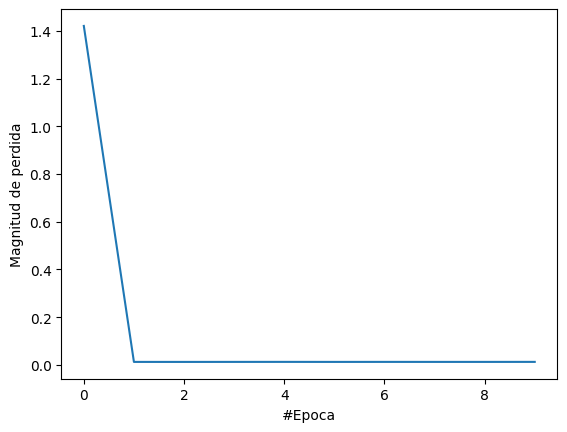

In [19]:
plt.xlabel("#Epoca")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history['loss'])
plt.show()

In [20]:
new_symptoms = np.array([[1,1,1,1,0,0,0,0,0,36,120,80,70,100,1.5]])
# print(new_symptoms)

predictions = model.predict(new_symptoms)
print("Predicciones de acciones preventivas:")
for i in range(len(new_symptoms)):
    print(f'Síntomas: {new_symptoms[i]}, Acción preventiva predicha: {predictions[i]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicciones de acciones preventivas:
Síntomas: [  1.    1.    1.    1.    0.    0.    0.    0.    0.   36.  120.   80.
  70.  100.    1.5], Acción preventiva predicha: [-0.25507987]
